In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plotly has been used for visualization
import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px
import os



import warnings    
warnings.filterwarnings("ignore")    # (Optional)

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'CC GENERAL.csv',
 'Data science pro practice.docx',
 'data_project.docx',
 'EDA.ipynb']

In [55]:
data = os.path.abspath(os.listdir()[1])
df = pd.read_csv(data)

# EDA        Overview of dataset - mean,counts,unique etc

In [56]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [57]:
stat_vals = []
conc_cols = df.columns.drop("CUST_ID")
for i in conc_cols : 
    unique_amounts = df[i].nunique()                   
    missing_vals=df[i].isnull().sum() 
    val_count= df[i].isnull().count() 
 
    stat_vals.append ([i,unique_amounts , missing_vals,val_count])
        
stats_df = pd.DataFrame (stat_vals)
stats_df.columns =['col_name','unique_amounts' ,'missing_vals', "val_count"]

In [58]:
stats_df

col_name  unique_amounts  missing_vals  val_count
0                            BALANCE            8871             0       8950
1                  BALANCE_FREQUENCY              43             0       8950
2                          PURCHASES            6203             0       8950
3                   ONEOFF_PURCHASES            4014             0       8950
4             INSTALLMENTS_PURCHASES            4452             0       8950
5                       CASH_ADVANCE            4323             0       8950
6                PURCHASES_FREQUENCY              47             0       8950
7         ONEOFF_PURCHASES_FREQUENCY              47             0       8950
8   PURCHASES_INSTALLMENTS_FREQUENCY              47             0       8950
9             CASH_ADVANCE_FREQUENCY              54             0       8950
10                  CASH_ADVANCE_TRX              65             0       8950
11                     PURCHASES_TRX             173             0       8950
12                      CREDIT_LIMIT             205             1       8950
13                          PAYMENTS            8711             0       8950
14                  MINIMUM_PAYMENTS            8636           313       8950
15                  PRC_FULL_PAYMENT              47             0       8950
16                            TENURE               7             0       8950

In [ ]:
# columns with missing vals - Credit limit and minimum payments

In [ ]:
### Investigating missing values in dataframe

In [63]:
df.loc[df["CREDIT_LIMIT"].isna()]
# nan value  - can drop this value

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [64]:
df = df.dropna(subset=["CREDIT_LIMIT"])

In [66]:
df.loc[df["MINIMUM_PAYMENTS"].isna()]
# off initial glances these na values have a lot of payment values at 0. When no payments have been made there wouldnt be be a need for minimum payments

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
54    C10056     6.660517           0.636364     310.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
...      ...          ...                ...        ...               ...   
8919  C19160    14.524779           0.333333     152.00            152.00   
8929  C19170   371.527312           0.333333       0.00              0.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8946  C19187    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN          

In [67]:
df.loc[(df["MINIMUM_PAYMENTS"].isna()) & (df["PAYMENTS"]==0),"MINIMUM_PAYMENTS"] = 0
# setting min payments to 0 when payments = 0 for instances where min payment is null
# will drop other 110 instances

Dealing with other 73 instances where there is no minimum payments and the payments isnt equal to 0.

In [68]:
df.loc[(df["MINIMUM_PAYMENTS"].isna()) & (df["PAYMENTS"]!=0)]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
54    C10056   6.660517           0.636364     310.00              0.00   
99    C10104   0.000000           0.000000       0.00              0.00   
146   C10152  19.354559           0.909091     689.70              0.00   
319   C10330   0.478714           0.090909     734.97            159.00   
1155  C11198  34.207779           0.090909    2483.26           2483.26   
...      ...        ...                ...        ...               ...   
8561  C18794   3.229304           0.545455     190.20              0.00   
8593  C18827  16.887571           0.363636    1083.00           1083.00   
8647  C18882   0.006651           0.142857       0.00              0.00   
8753  C18992   0.223351           0.090909     336.00              0.00   
8946  C19187  19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
54                    310.00      0.000000             0.666667   
99                      0.00     89.849004             0.000000   
146                   689.70      0.000000             0.833333   
319                   575.97      0.000000             0.833333   
1155                    0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8561                  190.20      0.000000             0.666667   
8593                    0.00      0.000000             0.250000   
8647                    0.00    164.137866             0.000000   
8753                  336.00      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
54                      0.000000                          0.666667   
99                      0.000000                          0.000000   
146                     0.000000                          0.833333   
319                     0.083333                          0.750000   
1155                    0.083333                          0.000000   
...                          ...                               ...   
8561                    0.000000                          0.583333   
8593                    0.250000                          0.000000   
8647                    0.000000                          0.000000   
8753                    0.000000                          0.916667   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
54                  0.000000                 0              8        1000.0   
99                  0.142857                 1              0        3000.0   
146                 0.000000                 0             10       10000.0   
319                 0.000000                 0             16        6000.0   
1155                0.000000                 0              1       10000.0   
...                      ...               ...            ...           ...   
8561                0.000000                 0              8        1500.0   
8593                0.000000                 0              3        1200.0   
8647                0.142857                 1              0        1200.0   
8753                0.000000                 0             12        1000.0   
8946                0.000000                 0              6        1000.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
54      417.016763               NaN               0.0      12  
99      138.021428               NaN               0.0       7  
146     746.691026               NaN               0.0      12  
319    1159.135064               NaN               0.0      12  
1155  29272.486070               NaN               0.0      12  
...            ...               ...               ...     ...  
8561    295.937124               NaN               0.0

In [69]:
# summary stats for this subset
df.loc[(df["MINIMUM_PAYMENTS"].isna()) & (df["PAYMENTS"]!=0)].describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   73.000000          73.000000    73.000000         73.000000   
mean     4.743161           0.135394   325.447260        142.156849   
std     16.468968           0.252533   423.962743        432.839876   
min      0.000000           0.000000     0.000000          0.000000   
25%      0.000000           0.000000    70.650000          0.000000   
50%      0.000000           0.000000   199.730000          0.000000   
75%      2.115080           0.125000   408.380000         54.000000   
max    132.734460           1.000000  2483.260000       2483.260000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count               73.000000     73.000000            73.000000   
mean               183.290411     32.888743             0.505580   
std                198.655493    126.899734             0.395660   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                126.660000      0.000000             0.454545   
75%                300.000000      0.000000             1.000000   
max                689.700000    922.817511             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                   73.000000                         73.000000   
mean                     0.043749                          0.453715   
std                      0.124992                          0.409863   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.416667   
75%                      0.083333                          0.833333   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count               73.000000         73.000000      73.000000     73.000000   
mean                 0.012960          0.123288       6.246575   3105.479452   
std                  0.035856          0.331042       5.155312   2250.795564   
min                  0.000000          0.000000       0.000000    500.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       6.000000   2500.000000   
75%                  0.000000          0.000000      12.000000   4000.000000   
max                  0.142857          1.000000      20.000000  11000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
count     73.000000               0.0              73.0  73.000000  
mean    1381.857133               NaN               0.0  11.369863  
std     3973.783829               NaN               0.0   1.495427  
min        2.389583               NaN               0.0   6.000000  
25%      178.707279               NaN               0.0  12.000000  
50%      368.807294               NaN               0.0  12.000000  
75%      692.523718               NaN               0.0  12.000000  
max    29272.486070               NaN               0.0  12.000000

In [70]:
# fill remaining nan values with the median
# using median as distribution is skewed. (show this with visualisation). Using medium will keep distribution very similiar

In [71]:
median_val = df["MINIMUM_PAYMENTS"].median()
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(value=median_val)    # filled with median val

In [72]:
df.loc[df["MINIMUM_PAYMENTS"].isna()]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

Now I am going to view distributions for the variables.

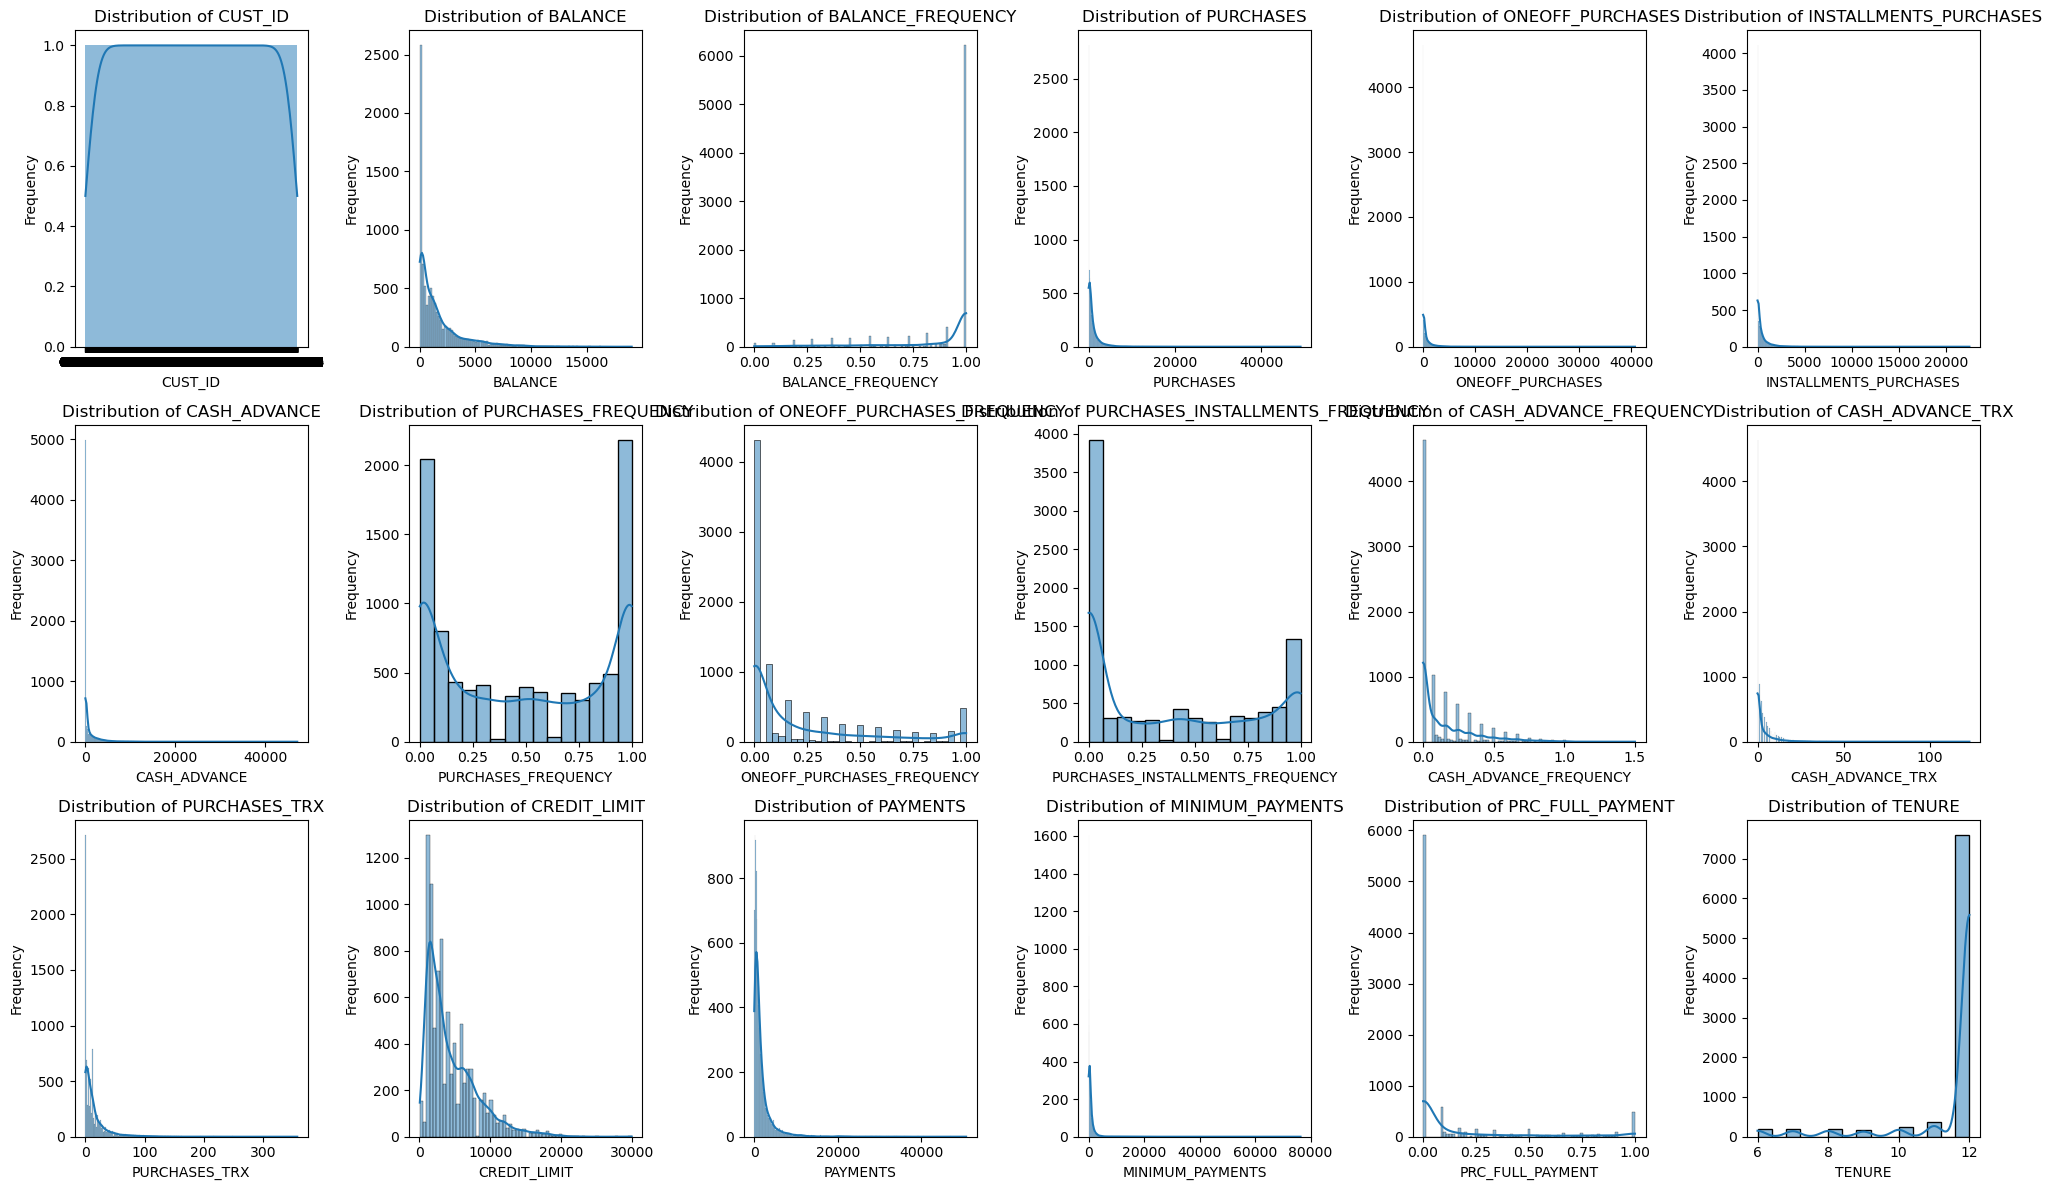

In [43]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20,12))
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True,ax=axes[i // 6, i % 6])
    axes[i // 6, i % 6].set_title(f'Distribution of {column}')
    axes[i // 6, i % 6].set_xlabel(column) 
    axes[i // 6, i % 6].set_ylabel('Frequency') # Adjust layout 
plt.tight_layout() 
plt.show()

In [73]:
## view distributions, try and normalze/stnadardise.
## clustering, then PCA to visualise clusters

Talk on being a clustering problem do we need to handle the skewness. For anomaly detection we'd keep these otliers etc. We want to handle skewness as much as possible to form better clusters. Do by scaling data

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
df = df.drop(columns="CUST_ID")   # dropping ID column

In [77]:
for col in df.columns:
    df[col] = np.log(1 + df[col])

In [78]:
num_vars = len(df.columns) 
num_cols = 6 # Number of columns in the grid 
num_rows = (num_vars // num_cols)+1

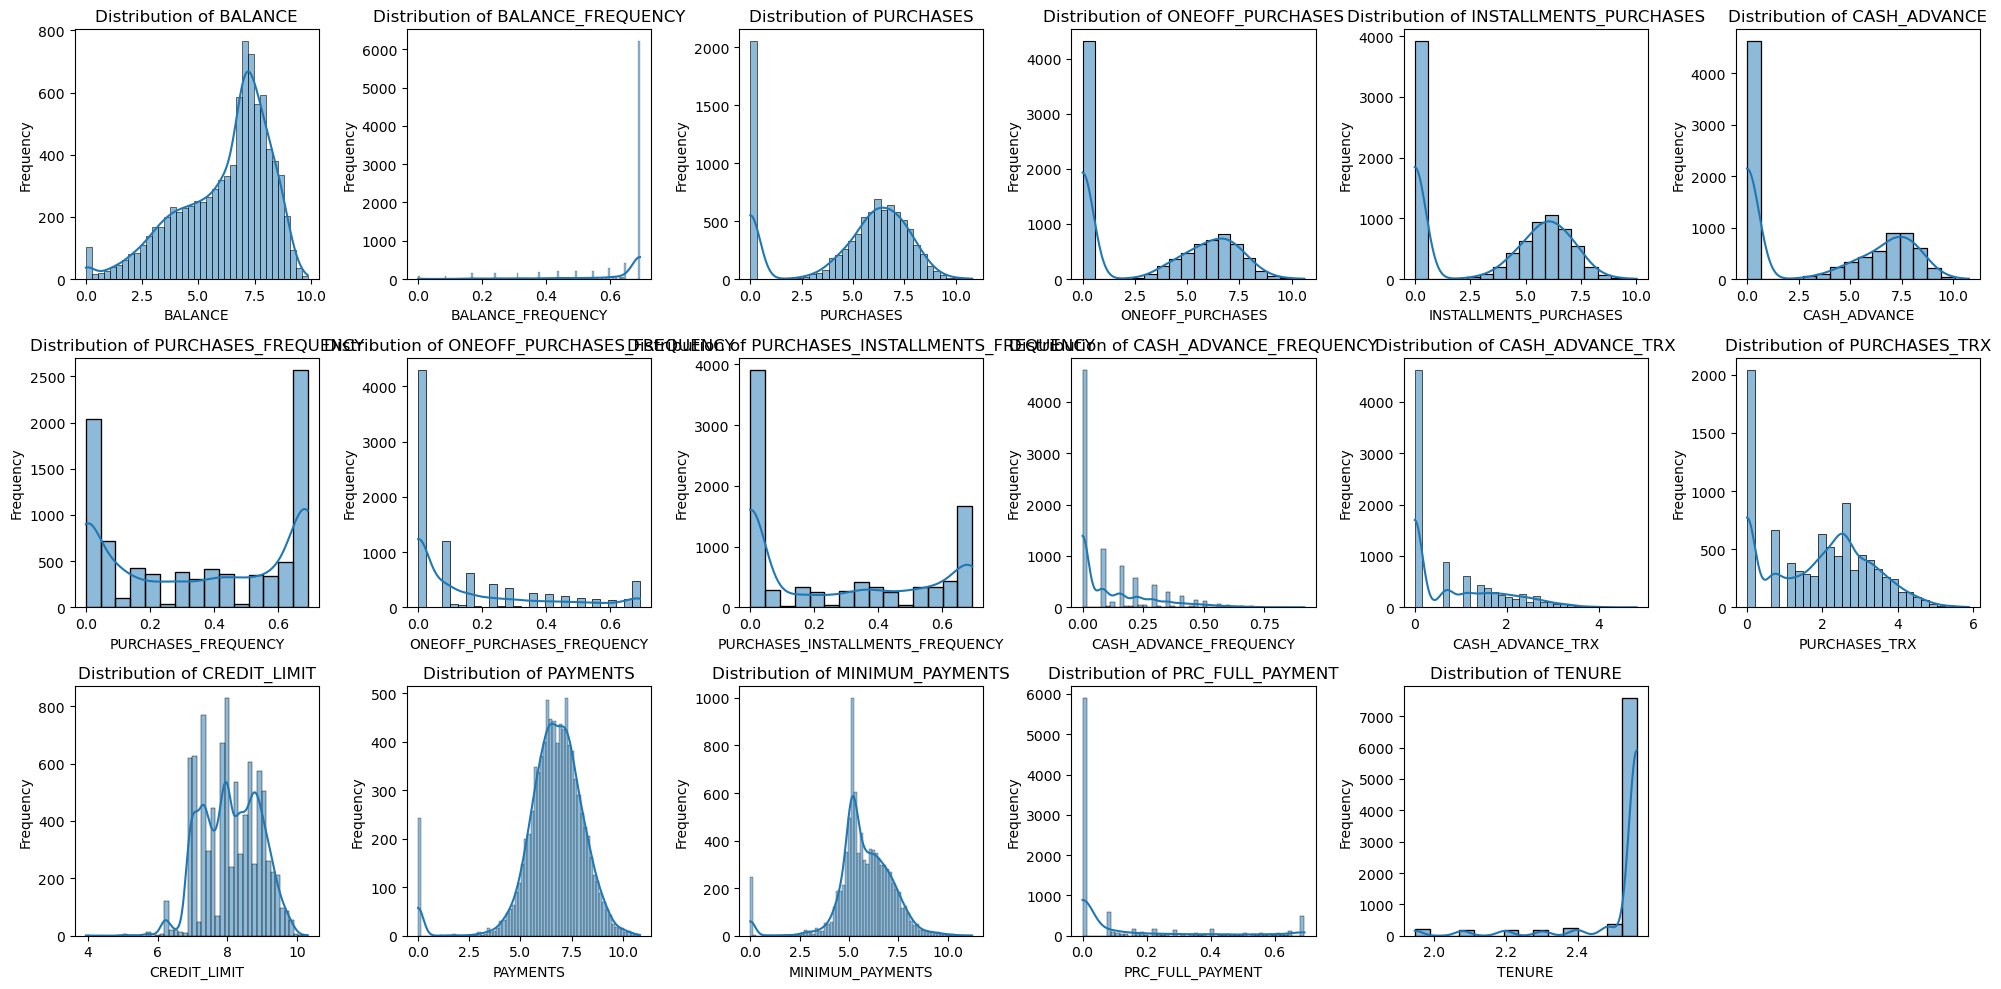

In [31]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10)) 
# Plot each variable's distribution 
for i, column in enumerate(df.columns): 
    sns.histplot(df[column], kde=True, ax=axes[i // num_cols, i % num_cols]) 
    axes[i // num_cols, i % num_cols].set_title(f'Distribution of {column}') 
    axes[i // num_cols, i % num_cols].set_xlabel(column) 
    axes[i // num_cols, i % num_cols].set_ylabel('Frequency') # Hide any empty subplots 
for j in range(num_vars, num_rows * num_cols): 
    fig.delaxes(axes.flatten()[j]) 

# Adjust layout 
plt.tight_layout() 
plt.show()

As we can see this has normalized some of the distributions and removed some of the right skew that was previously present. This has positive benefits on the algorithm.

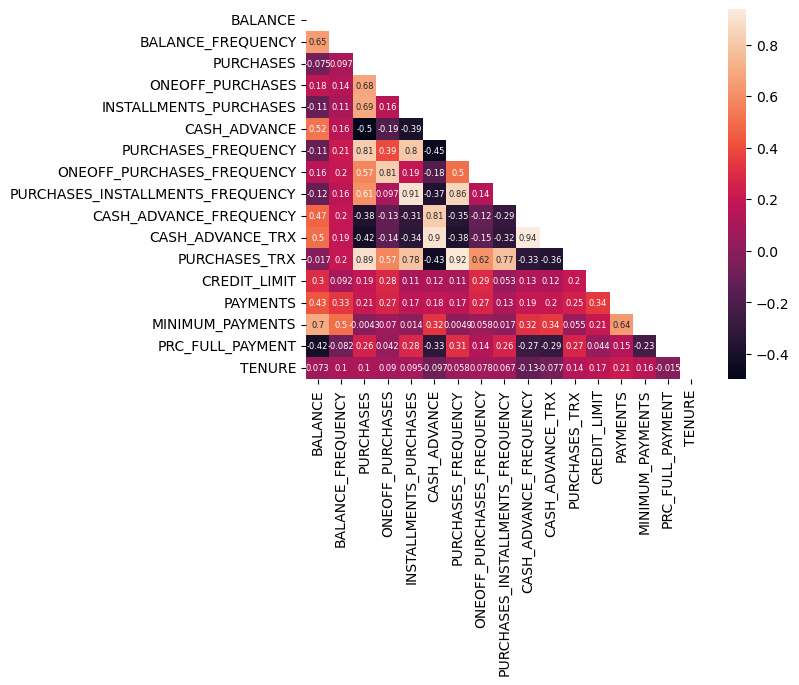

In [79]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
ax = sns.heatmap(df.corr(),annot=True,annot_kws={"size": 6},mask=mask)
plt.show()
# correlation between variables   Going to handle this with PCA -  a dimensionalty reduction technique. Go into more detail/information on this.

In [81]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(df)
    cost.append(kmean.inertia_)

Talk on justifications for intertia vs cost. Inertia is a measure of how well clusters are defined.

In [169]:
pca = PCA(n_components=3)   #   Can initialize any value here
X_tran = pca.fit_transform(df)

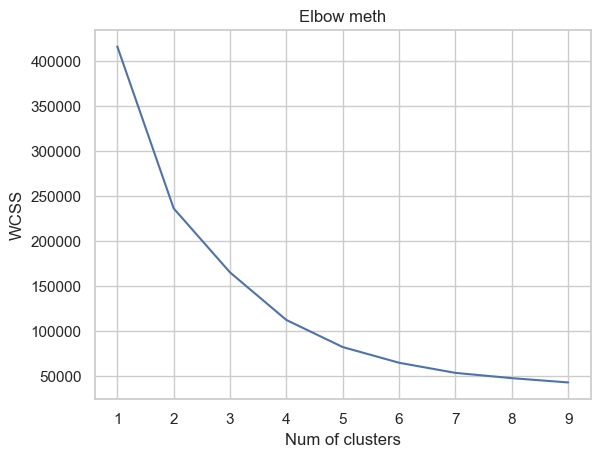

In [170]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_tran) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow meth')
plt.xlabel('Num of clusters')
plt.ylabel('WCSS')
plt.show()

#WCSS sum of variance between observations in each cluster.  - 
Elbow is around 3-4 in this scenario. To compare these similiar instances we can use the silhouette score to compare
The silhouette score measures how well the dataset was clustered by measureing the similiarit within clusters and the difference out of clusters as well. 

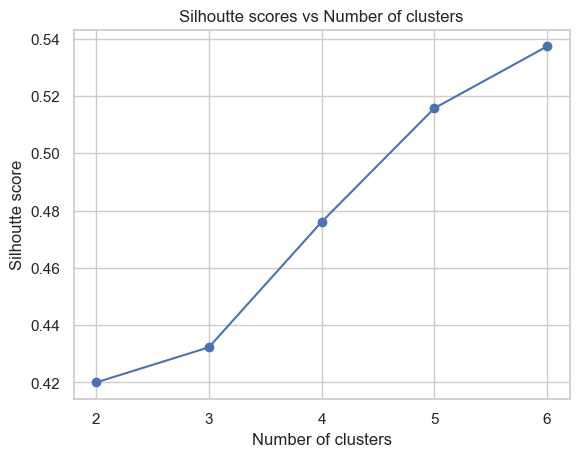

In [171]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X_tran, model.labels_) for model in kmeans_models[1:6]]
plt.plot(range(2,7), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4,5,6])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

As seen 4 looks like the optimal cluster number based on the increased silhouette score. We dont want too many clusters

In [172]:
final_model = kmeans_models[3]
final_model

KMeans(n_clusters=4, random_state=23)

In [182]:
# Print cumulative explained variance
for i, cumulative_variance in enumerate(cumulative_explained_variance):
    print(f"Up to Principal Component {i + 1}: {cumulative_variance:.2%} of variance explained")

Up to Principal Component 1: 47.72% of variance explained
Up to Principal Component 2: 71.85% of variance explained
Up to Principal Component 3: 86.06% of variance explained


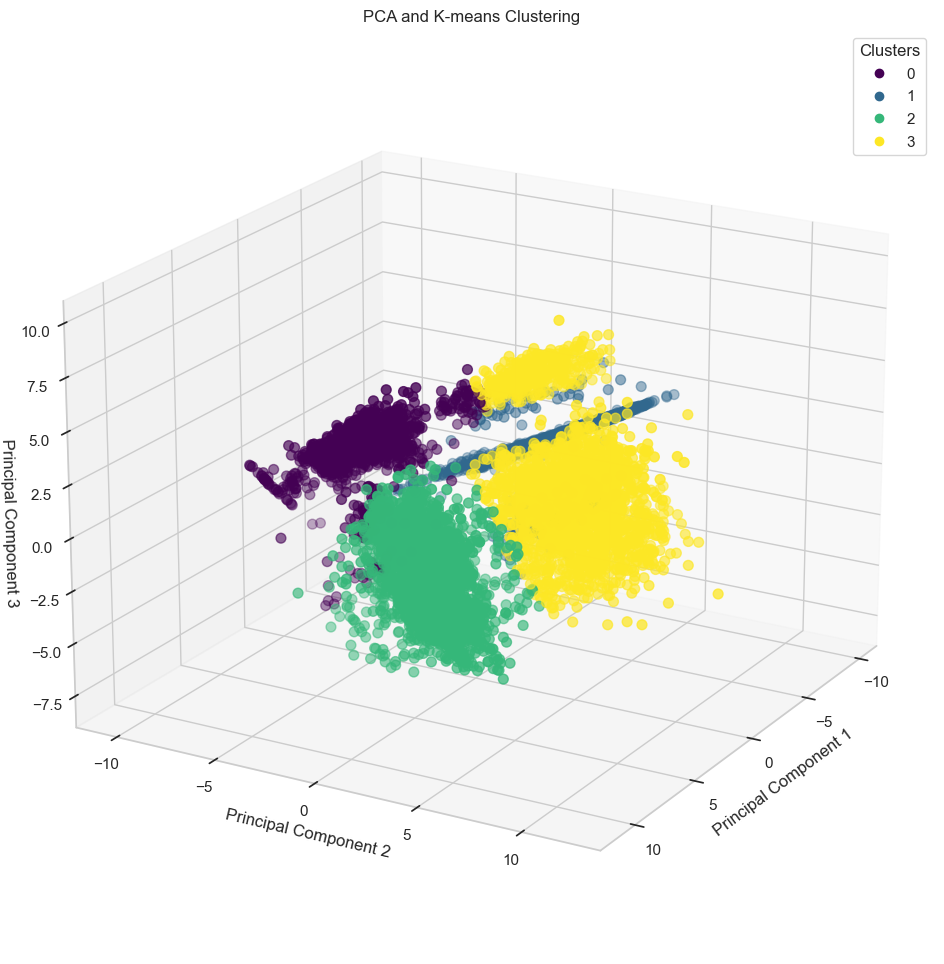

In [177]:
from mpl_toolkits.mplot3d import Axes3D

labels = final_model.labels_

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Create 3D scatter plot
sc = ax.scatter(X_tran[:, 0], X_tran[:, 1], X_tran[:, 2], c=labels, cmap='viridis', s=50)

# Add axis labels and title
ax.set_title('PCA and K-means Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.view_init(elev=20, azim=30)
# Add legend
plt.legend(*sc.legend_elements(), title="Clusters")
plt.show()


Visualizing cluster based on principal components.

In [178]:
#Get component loadings
loadings = pca.components_ 
component_names = [f'PC{i+1}' for i in range(loadings.shape[0])] 

In [179]:
# Convert NumPy array to DataFrame for loadings 

loadings_df = pd.DataFrame(loadings.T, columns=component_names,index=df.columns)
print(loadings_df.head(5))

                             PC1       PC2       PC3
BALANCE                -0.103774  0.411236  0.121902
BALANCE_FREQUENCY       0.000359  0.017760  0.011144
PURCHASES               0.528941  0.221252  0.053236
ONEOFF_PURCHASES        0.388679  0.557510 -0.552312
INSTALLMENTS_PURCHASES  0.446058 -0.002227  0.730074


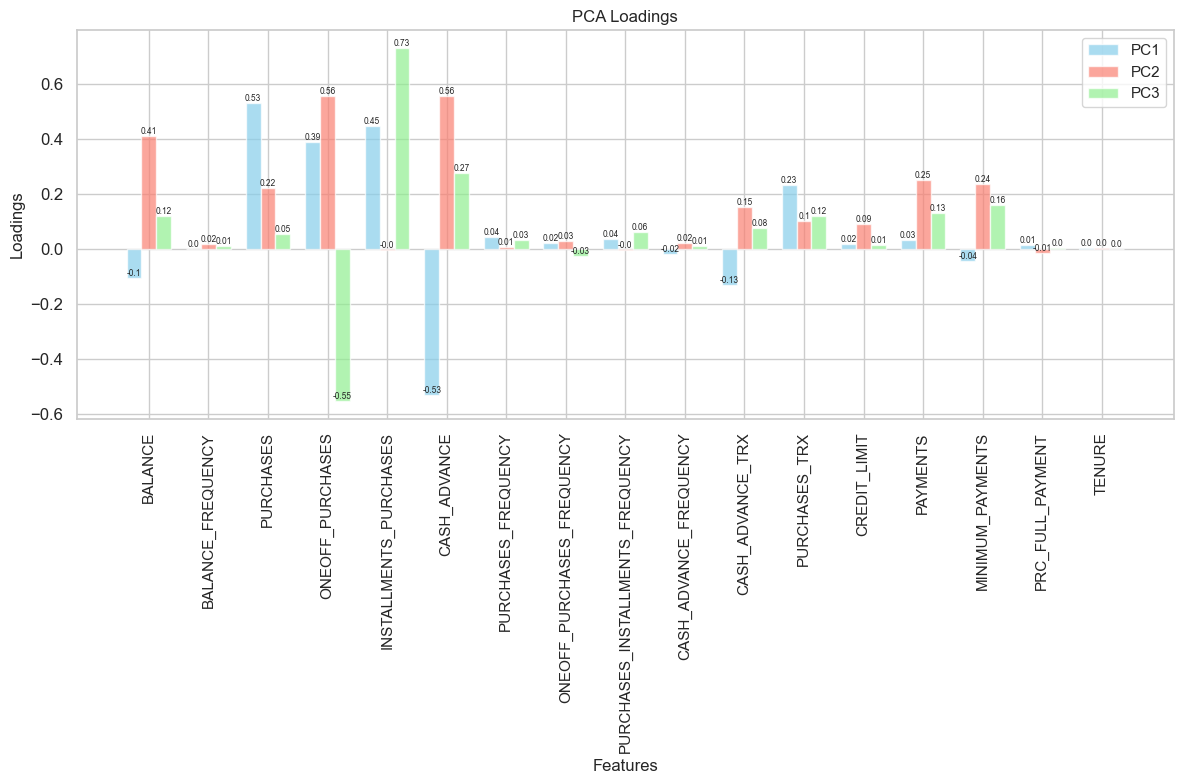

In [189]:
# Set a modern style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

# Plot PC1, PC2, and PC3 loadings with different colors
bar_width = 0.25
index = np.arange(len(loadings_df.index))
plt.bar(index, loadings_df['PC1'], bar_width, alpha=0.7, label='PC1', color='skyblue')
plt.bar(index + bar_width, loadings_df['PC2'], bar_width, alpha=0.7, label='PC2', color='salmon')
plt.bar(index + 2 * bar_width, loadings_df['PC3'], bar_width, alpha=0.7, label='PC3', color='lightgreen')

# Add annotations for loadings
for i in range(len(loadings_df.index)):
    plt.text(i, loadings_df['PC1'][i], round(loadings_df['PC1'][i], 2), ha='center', va='bottom',fontsize=6)
    plt.text(i + bar_width, loadings_df['PC2'][i], round(loadings_df['PC2'][i], 2), ha='center', va='bottom',fontsize=6)
    plt.text(i + 2 * bar_width, loadings_df['PC3'][i], round(loadings_df['PC3'][i], 2), ha='center', va='bottom',fontsize=6)

plt.ylabel('Loadings')
plt.xlabel('Features')
plt.title('PCA Loadings')

# Rotate feature text labels
plt.xticks(index + bar_width, loadings_df.index, rotation=90)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()

plt.show()


	• PC3 - Individuals who didn’t have many one off purchases but paid a larger amount of purchases in installments. 
    • PC2 - Increased 1 off purchases and advance cash payments and had a higher balance.
	• PC1 - These individuals didn't use cash in advance as often.And had increased purchases installment purchases (not as high as pc3.)


In [181]:
# Print cumulative explained variance
for i, cumulative_variance in enumerate(cumulative_explained_variance):
    print(f"Up to Principal Component {i + 1}: {cumulative_variance:.2%} of variance explained")

Up to Principal Component 1: 47.72% of variance explained
Up to Principal Component 2: 71.85% of variance explained
Up to Principal Component 3: 86.06% of variance explained


Now with this we can interpret what the clusters represenet.

In [191]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for the principal components
df = pd.DataFrame({
    'PC1': X_tran[:, 0],
    'PC2': X_tran[:, 1],
    'PC3': X_tran[:, 2],
    'Cluster': labels
})

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    title='PCA and K-means Clustering',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'}
)

# Show the plot
fig.show()
